## K Means를 이용한 이미지 압축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load

In [6]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')

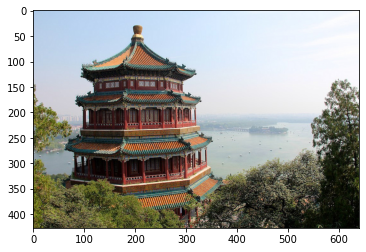

In [7]:
plt.imshow(china)

### 1.2 Data Scaling

In [8]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [5]:
china_flatten = china / 255.0
china_flatten = china_flatten.reshape(-1, 3)
china_flatten.shape

(273280, 3)

### 1.3 EDA

In [11]:
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

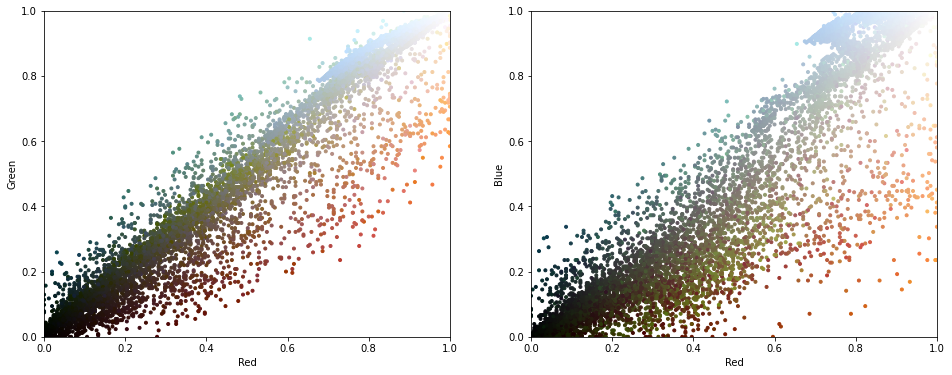

In [12]:
plot_pixels(china_flatten)

## 2. K Means

### 2.1 학습

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)

# 16개의 색상으로 압축.

In [15]:
kmeans.fit(china_flatten)

KMeans(n_clusters=16)

### 2.2 새로운 색상

In [16]:
kmeans.cluster_centers_

# 새로 사용하게 될 16개의 RGB 값.

array([[0.80549125, 0.82568196, 0.84582132],
       [0.21193767, 0.21814216, 0.17564014],
       [0.0526081 , 0.04952519, 0.02706409],
       [0.94834658, 0.96246651, 0.98636038],
       [0.43003783, 0.43669416, 0.3803182 ],
       [0.15046821, 0.12373148, 0.08942748],
       [0.5969658 , 0.64021332, 0.62701792],
       [0.86027767, 0.62320909, 0.45733213],
       [0.75099486, 0.83983001, 0.94027327],
       [0.3213541 , 0.32114689, 0.26951751],
       [0.68210398, 0.40587441, 0.28930529],
       [0.36023306, 0.24569558, 0.12413976],
       [0.4517457 , 0.42230168, 0.21268613],
       [0.86826794, 0.91447687, 0.96601222],
       [0.7147066 , 0.75297169, 0.7439672 ],
       [0.54962875, 0.54522612, 0.44916417]])

### 2.3 변환

In [17]:
new_color_label = kmeans.predict(china_flatten)

In [18]:
new_colors = kmeans.cluster_centers_[new_color_label]

# 새로 정의한 cluster centers로 변환.

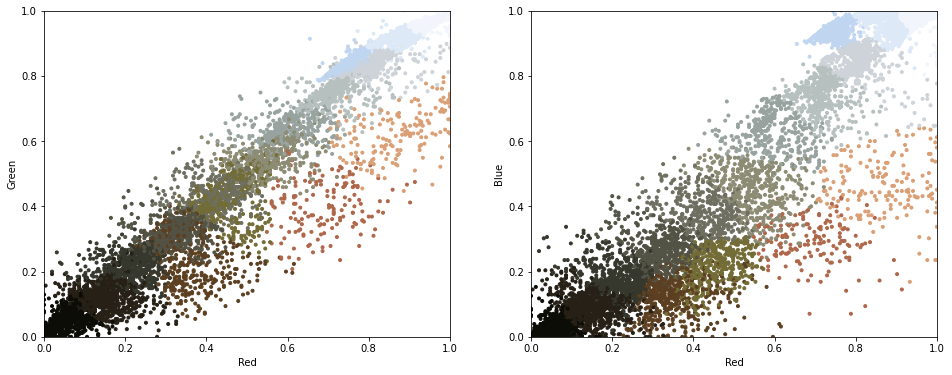

In [19]:
plot_pixels(china_flatten, colors=new_colors)

Text(0.5, 1.0, '16-color Image')

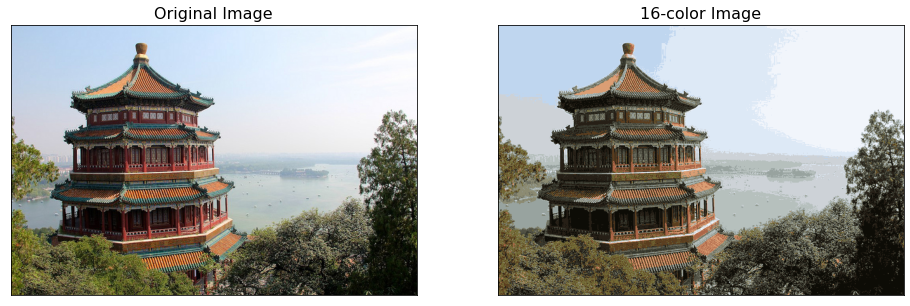

In [20]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

## 3. 더 작은 K

### 3.1 학습

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

In [25]:
kmeans.fit(china_flatten)

KMeans()

### 3.2 새로운 색상

In [26]:
kmeans.cluster_centers_

array([[0.40700952, 0.36492907, 0.24441066],
       [0.91686169, 0.94315022, 0.97723307],
       [0.08748879, 0.07663548, 0.05118961],
       [0.67146158, 0.70577188, 0.69211455],
       [0.77597886, 0.83567083, 0.89986526],
       [0.81157041, 0.56309418, 0.40496772],
       [0.51549875, 0.51526593, 0.42809221],
       [0.24107331, 0.21369541, 0.1554647 ]])

### 3.3 변환

In [27]:
new_color_label = kmeans.predict(china_flatten)

In [28]:
new_colors = kmeans.cluster_centers_[new_color_label]

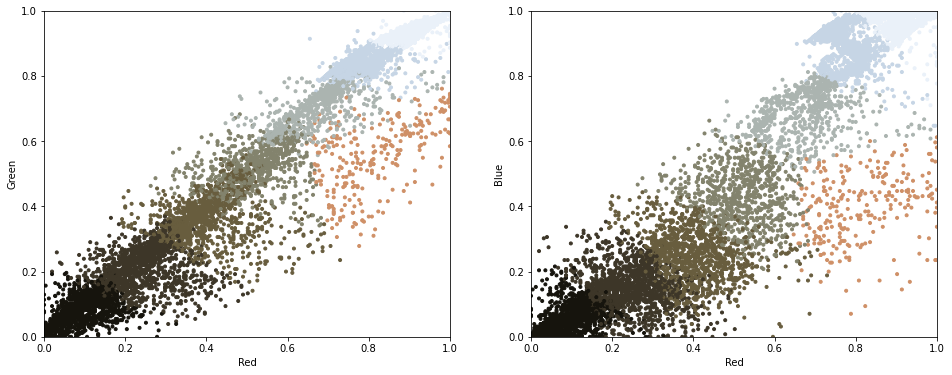

In [29]:
plot_pixels(china_flatten, colors=new_colors)

Text(0.5, 1.0, '8-color Image')

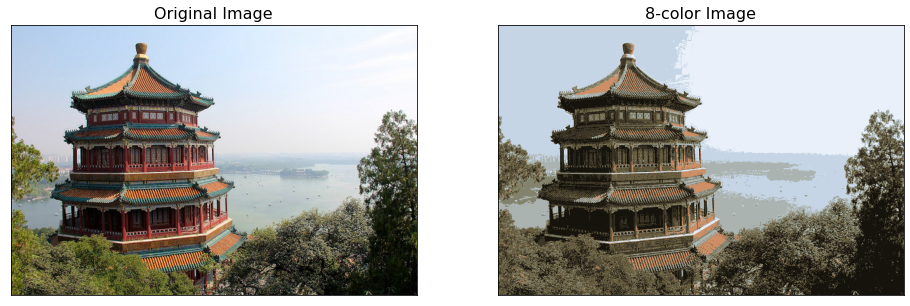

In [32]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('8-color Image', size=16)